Descrição dos Dados: Foi obtida uma amostra de 1338 clientes de um seguro de vida com as seguintes características:


idade: idade do beneficiário principal

sexo: gênero do contratante de seguros, feminino, masculino

imc: índice de massa corporal, que fornece uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura

filhos: Número de filhos cobertos por seguro saúde/dependentes

fumante: status sim ou não

região: a área residencial do beneficiário nos EUA: nordeste, sudeste, sudoeste, noroeste.

despesas: Custos médicos individuais cobrados pelo seguro de saúde

In [ ]:
# Importação do arquivo CSV

from google.colab import files
uploaded = files.upload()
    

Saving seguro_de_vida.csv to seguro_de_vida.csv


In [ ]:
# Leitura do arquivo, utilizando Pandas

import pandas as pd

dados = pd.read_csv('seguro_de_vida.csv')

print(dados.head())


   idade       sexo     imc  filhos fumante    regiao     despesas
0     19   feminino  27.900       0     sim  sudoeste  16884.92400
1     18  masculino  33.770       1     nao   sudeste   1725.55230
2     28  masculino  33.000       3     nao   sudeste   4449.46200
3     33  masculino  22.705       0     nao  noroeste  21984.47061
4     32  masculino  28.880       0     nao  noroeste   3866.85520


In [ ]:
# Realizando Import das bibliotecas matplotlib e seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Para garantir que os gráficos apareçam no notebook
%matplotlib inline

In [ ]:
# Verificando o tipo de dados de cada coluna do arquivo
print(dados.dtypes)


idade         int64
sexo         object
imc         float64
filhos        int64
fumante      object
regiao       object
despesas    float64
dtype: object


# 1 : Classificando as variáveis enquanto seu tipo:

* Idade : Numérica
* Sexo : Nominal
* IMC : Numérica
* Filhos : Numérica
* Fumante : Categórica
* Região : Categórica
* Despesas : Numérica

# 2 : Informando medidas das variáveis numéricas


In [ ]:
# Para realizar esta questão, é necessário de início filtrar as variáveis numéricas (que podem e serão mensuradas):

# Filtro das colunas numéricas
variaveis_numericas = dados.select_dtypes(include=['float64', 'int64'])

print(variaveis_numericas.head())

   idade     imc  filhos     despesas
0     19  27.900       0  16884.92400
1     18  33.770       1   1725.55230
2     28  33.000       3   4449.46200
3     33  22.705       0  21984.47061
4     32  28.880       0   3866.85520


In [ ]:
# Calculo de média, mediana, desvio padrão e quartis para as variáveis numéricas

# Média
media = variaveis_numericas.mean()
print("Média:\n", media)

# Mediana
mediana = variaveis_numericas.median()
print("\nMediana:\n", mediana)

# Desvio padrão
desvio_padrao = variaveis_numericas.std()
print("\nDesvio Padrão:\n", desvio_padrao)

# Quartis (Q1, Q2, Q3)
quartis = variaveis_numericas.quantile([0.25, 0.5, 0.75])
print("\nQuartis (Q1, Q2, Q3):\n", quartis)


Média:
 idade          39.207025
imc            30.663397
filhos          1.094918
despesas    13270.422265
dtype: float64

Mediana:
 idade         39.000
imc           30.400
filhos         1.000
despesas    9382.033
dtype: float64

Desvio Padrão:
 idade          14.049960
imc             6.098187
filhos          1.205493
despesas    12110.011237
dtype: float64

Quartis (Q1, Q2, Q3):
       idade       imc  filhos      despesas
0.25   27.0  26.29625     0.0   4740.287150
0.50   39.0  30.40000     1.0   9382.033000
0.75   51.0  34.69375     2.0  16639.912515


# 3 : Realizando o Gráfico em Histograma para Despesas e analisando tendências

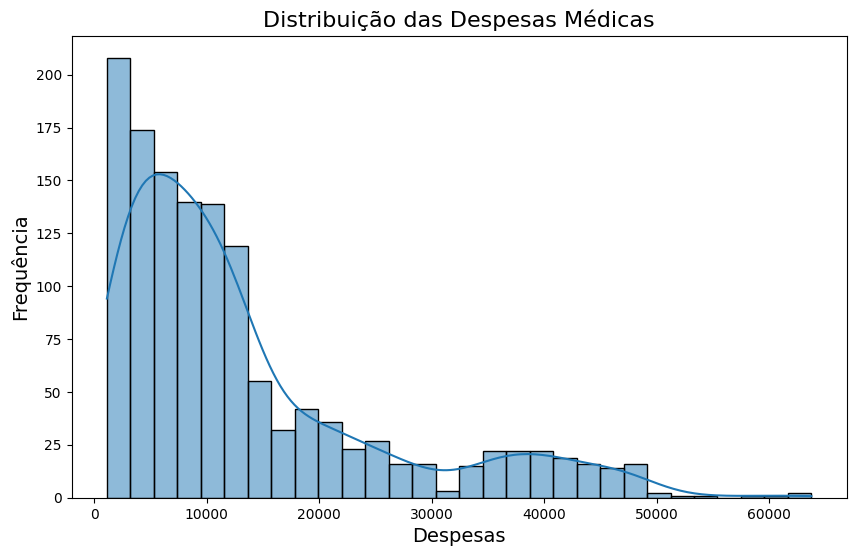

In [ ]:

# Gerando gráfico em histograma da variável 'despesas'
plt.figure(figsize=(10,6))
sns.histplot(dados['despesas'], bins=30, kde=True)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição das Despesas Médicas', fontsize=16)
plt.xlabel('Despesas', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

plt.show()

* A distribuição das despesas médicas é visivelmente assimétrica, com uma cauda longa à direita. Isso indica que, embora a maioria dos clientes tenha despesas mais baixas, há alguns indivíduos com despesas médicas muito elevadas.
Essa característica sugere que uma pequena porcentagem de clientes está incorrendo em custos médicos muito altos, possivelmente devido a tratamentos ou condições de saúde mais complexas.
* Há algumas despesas muito altas em comparação com a maioria dos valores observados. Esses outliers podem influenciar a média, fazendo com que ela seja maior do que a mediana.
* A tendência principal aqui é que a maioria dos clientes tem custos médicos moderados, enquanto um pequeno grupo possui despesas significativamente mais altas. Essa distribuição assimétrica pode ser comum em seguros de saúde, onde poucos indivíduos enfrentam doenças graves ou tratamentos prolongados, elevando os custos.

# 4 : Criando gráfico de barras para ver frequência do num. de Filhos dentro da base de dados


<ipython-input-8-ce5d81e6376e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filhos_freq.index, y=filhos_freq.values, palette="viridis")


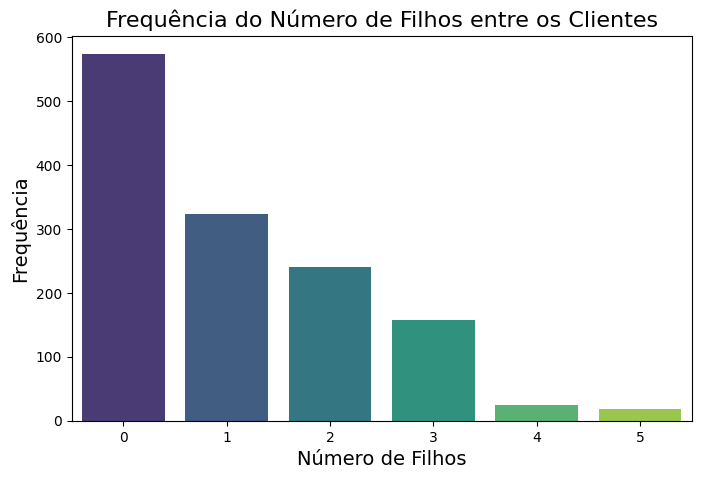

0

In [ ]:
# Conta da frequência de cada número de filhos
filhos_freq = dados['filhos'].value_counts()

# Criação do gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=filhos_freq.index, y=filhos_freq.values, palette="viridis")

# Adicionando título e rótulos
plt.title('Frequência do Número de Filhos entre os Clientes', fontsize=16)
plt.xlabel('Número de Filhos', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

plt.show()

# Mostrando o valor mais frequente
numero_mais_frequente = filhos_freq.idxmax()
numero_mais_frequente

# 5 : Percentual de fumantes presentes na base de dados

In [ ]:
# Calculo do percentual de clientes fumantes
percentual_fumantes = (dados['fumante'].value_counts(normalize=True) * 100)['sim']

# Exibição do percentual de fumantes
percentual_fumantes

20.47832585949178

# 6 : Criação do BoxPlot para variáveis de despesas e fumantes e realizando análise

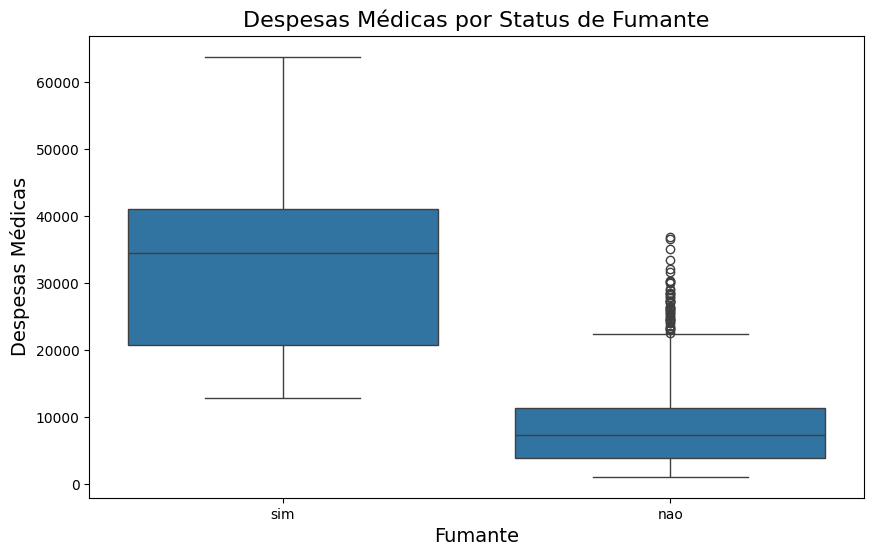

In [ ]:
# Criação de um boxplot relacionando a variável 'despesas' e 'fumante'
plt.figure(figsize=(10,6))
sns.boxplot(x='fumante', y='despesas', data=dados)

# Adicionando título e rótulos
plt.title('Despesas Médicas por Status de Fumante', fontsize=16)
plt.xlabel('Fumante', fontsize=14)
plt.ylabel('Despesas Médicas', fontsize=14)

plt.show()

1.
*  O boxplot dos fumantes tem uma mediana consideravelmente mais alta em comparação com os não fumantes, o que indica que, em geral, os fumantes tendem a ter custos médicos maiores.
* A faixa interquartil (distância entre o primeiro e o terceiro quartil) também é maior para os fumantes, sugerindo uma maior variação nas despesas médicas.
2.
* Ambos os grupos têm outliers (pontos fora da caixa), mas os fumantes parecem ter mais casos de despesas extremamente altas. Esses valores altos podem estar relacionados a complicações de saúde devido ao tabagismo.
3.
* Os não fumantes têm uma distribuição mais concentrada, com despesas geralmente mais baixas e com menor dispersão. Isso sugere que, para quem não fuma, os custos médicos tendem a ser mais controlados.
4.
* Os fumantes têm uma clara tendência a ter despesas médicas mais elevadas, com maior variação, enquanto os não fumantes apresentam despesas mais baixas e consistentes. Isso pode estar relacionado aos problemas de saúde associados ao tabagismo, que impactam os custos médicos.

